# F23 MATH 596 Final Project Code

# Credit Card Fraud Analysis and Prediction

## Setup

This section does not need to be expanded or explored.

### Imports

In [1]:
# Backend Code
import credit_card_fraud as ccf

# Data Manip
import pandas as pd

### Grabbing Data

In [2]:
df = pd.read_csv(
    "creditcard_2023.csv",
    header = 'infer'
)
df.drop(['id'], axis=1, inplace = True)
df['Class'] = df['Class'].astype(bool)
df.head(5)

target='Class'

ccf.setup(df, 'Class')

In [3]:
print(ccf.get_features())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


## Exploratory Data Analysis

The first step is the explore our data set to see if we can gain any insight about the data. The obvious first, and only, choice is to look at `Amount`.

### Data Analysis - Histogram of Amount

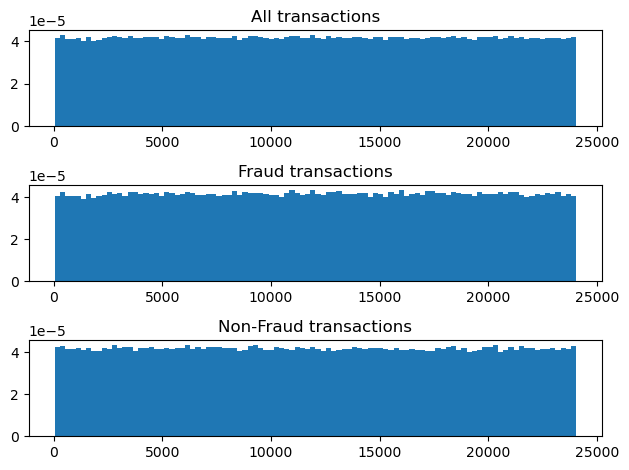

In [4]:
ccf.fraud_hist(100)

From the above histograms, we can see that there is absolutely no association between amount and fraudulent credit card transactions. But doing this for all 28 other features would be time-consuming and impractical.

### Data Analysis - Pricipal Component Analysis (PCA)

PCA provides us with multiple benefits:
- Dimensionality Reduction (Model Complexity Reduction)
- Decreased Overfitting
- Handles Multicollinearity

The Scree Plot and Cumulative Explained Variance plots below demonstrate how much each principal component accounts for explained variance.

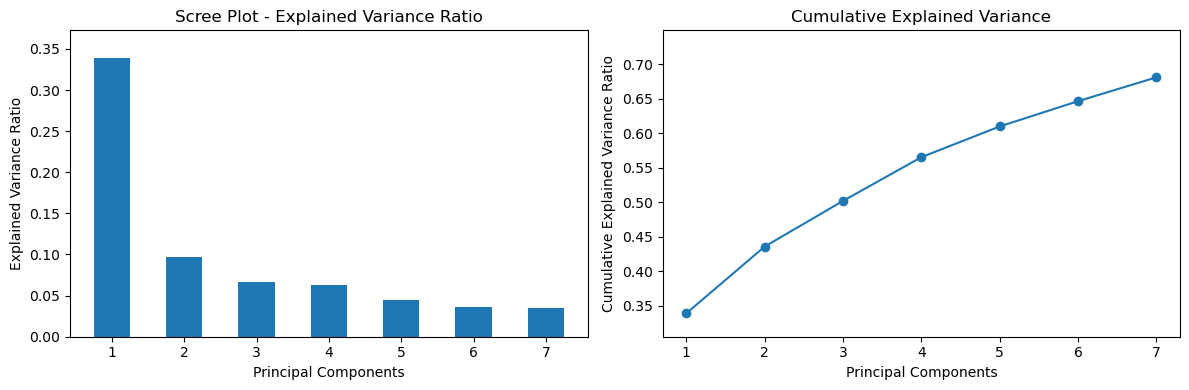

In [5]:
ccf.scree_plt()

The plots show that the 1st principal component(`PC1`) accounts for 33%, of the explained variance. All following principal components account for $<11%$ of explained variance. Because `PC1` is so important, we want to now find which features most greatly correlate to `PC1`. 


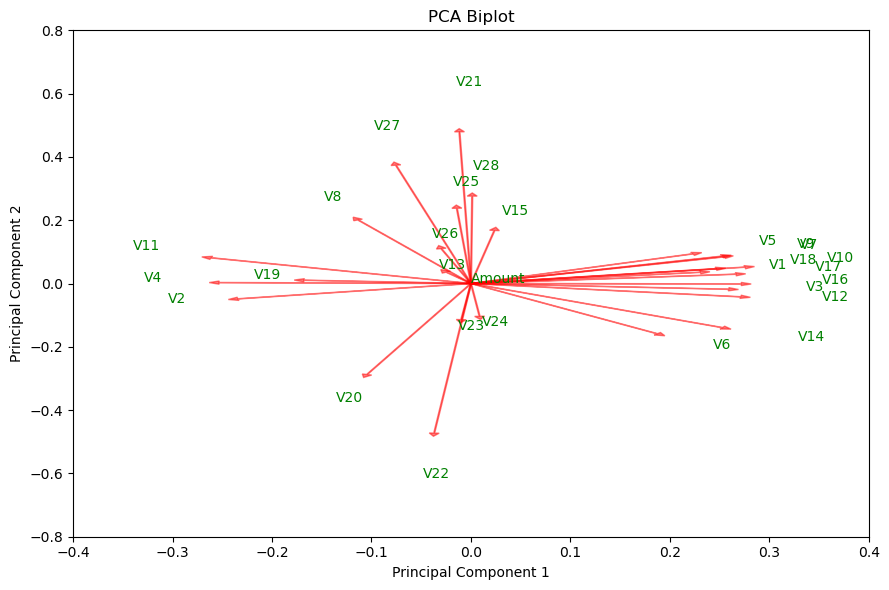

In [6]:
ccf.pca_biplot()

The features which most strongly correlate to `PC1` Are the features whose arrows are the larger along the x-axis. We can also view `PC1` vs. `PC2` by looking at all the data.

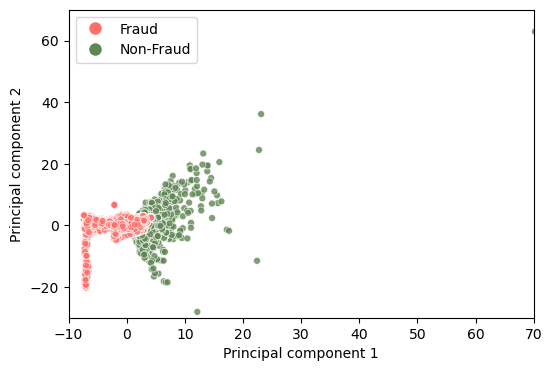

In [7]:
ccf.pca_scatter()

It is interesting to see that just `PC1` and `PC2` *almost* perfectly split the fraud and non-fraud transactions. Based on the PCA Biplot, we select our variables as well as define out target feature column matrix.

In [8]:
V = df[['V1','V2','V3','V4','V5','V6','V7','V9','V10','V11','V12','V14','V16','V17','V18','V19']]
y = df['Class']

## Modeling - Logistic Regression
Because the target feature is binary categorical data, logistic regression is the best approach. The specs of the model computed are:
- LOSS function = logit
- max iterations = 10,000
- learning rate = 'optimal'

In [9]:
model = ccf.fraud_model(V,y)

We want to avoit false negatives at almost all cost since it is an example of a fraudulent transaction not being flagged. To this end, we can select the cutoff value to find a point where we minimize the false negative rate while preserving as much overall accuracy as possible. By default, the cutoff is 0.5, and this produces the highest overall accuracy.

In [10]:
ccf.model_accuracy(model, cutoff = 0.75)

,Metric,Training Data,Testing Data
0,Accuracy,95.80%,95.77%
1,False Positive Rate (FPR),0.79%,0.80%
2,False Negative Rate (FNR),7.61%,7.65%


In [11]:
ccf.model_accuracy(model, cutoff = 0.50)

,Metric,Training Data,Testing Data
0,Accuracy,96.39%,96.38%
1,False Positive Rate (FPR),1.87%,1.84%
2,False Negative Rate (FNR),5.36%,5.40%


In [12]:
ccf.model_accuracy(model, cutoff = 0.25)

,Metric,Training Data,Testing Data
0,Accuracy,95.89%,95.86%
1,False Positive Rate (FPR),5.35%,5.38%
2,False Negative Rate (FNR),2.86%,2.90%


Even with a cutoff of 0.01, we can still have 70% accuracy.

In [13]:
ccf.model_accuracy(model, cutoff = 0.01)

,Metric,Training Data,Testing Data
0,Accuracy,70.44%,70.43%
1,False Positive Rate (FPR),58.84%,59.02%
2,False Negative Rate (FNR),0.24%,0.27%


Now let us explore the FNR and accuracy as the cutoff changes

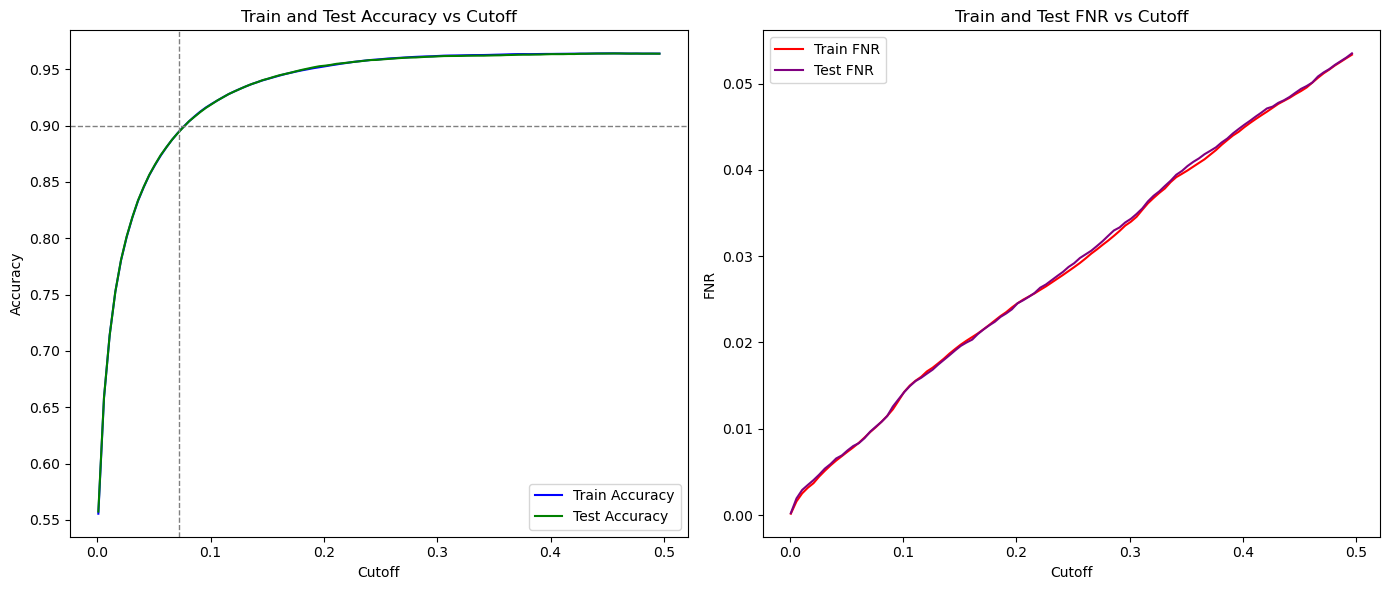

In [14]:
ccf.accuracy_FNR_plt(model)

We can see that cutoff is approximately linear to false negative rate. We alse see that if we are okay with lowering the accuracy to ~90%, we can use a cutoff of ~0.078 to maintain accuracy and lower the false negative rate.

In [17]:
ccf.model_accuracy(model, cutoff = 0.078)

,Metric,Training Data,Testing Data
0,Accuracy,90.07%,90.09%
1,False Positive Rate (FPR),18.80%,18.83%
2,False Negative Rate (FNR),1.05%,1.04%


We have successfully found a cutoff for our model that minimizes out false negative rate, while preserving above a 90% accuracy in both the training and testing data sets.

Note that the train/test split and gradient descent in the logistic model have `random_state = 333` set so that the dotted line on the train/test accuracy vs cutoff plot would properly line up. Removing the `random_state` would simply make the "best" cutoff value fluctuate.

## GenAI Statement
During the preparation of this work I used ChatGPT in order to quickly write code to calculate model accuracy/FPR/FNR, tabulate said data, plot model accuracy vs cutoff value, and turn the histograms into density histograms. After using this service, I reviewed and edited the content as needed and take full responsibility for the content of the report.